# Weather Data Cleaning

This notebook focuses on cleaning weather data by:
1. Concatenating datasets
2. Removing duplicates
3. Handling missing values
4. Converting data types
5. Detecting and handling outliers
6. Saving the cleaned dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic plot styling
sns.set_style('whitegrid')

## 1. Data Loading and Concatenation

In [5]:
# Load the datasets
df_2023 = pd.read_csv("../../data/processed/weather/NewYork 2023-01-01 to 2023-12-31.csv")
df_2024 = pd.read_csv("../../data/processed/weather/NewYork 2024-01-01 to 2025-03-03.csv")

print(f"2023 data shape: {df_2023.shape}")
print(f"2024 data shape: {df_2024.shape}")

# Concatenate the datasets
df = pd.concat([df_2023, df_2024], ignore_index=True)
print(f"Combined data shape: {df.shape}")

# Look at the first few rows
df.head()

2023 data shape: (365, 33)
2024 data shape: (428, 33)
Combined data shape: (793, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,NewYork,2023-01-01,24.0,10.0,16.7,24.0,10.0,16.7,9.7,65.2,...,16.8,7,10,2023-01-01T07:06:52,2023-01-01T17:53:11,0.30,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
1,NewYork,2023-01-02,22.0,8.0,15.4,22.0,7.9,15.3,8.2,64.1,...,17.2,7,10,2023-01-02T07:07:10,2023-01-02T17:53:49,0.34,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
2,NewYork,2023-01-03,20.7,9.0,14.7,20.7,7.3,14.6,7.7,64.5,...,17.2,7,10,2023-01-03T07:07:28,2023-01-03T17:54:28,0.37,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
3,NewYork,2023-01-04,19.0,7.0,13.0,19.0,4.8,12.6,6.1,65.6,...,17.4,7,10,2023-01-04T07:07:44,2023-01-04T17:55:08,0.41,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
4,NewYork,2023-01-05,19.0,8.0,13.5,19.0,5.3,12.8,8.2,71.2,...,14.5,6,10,2023-01-05T07:07:58,2023-01-05T17:55:48,0.44,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"


## 2. Initial Data Exploration

In [6]:
# Check data types and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              793 non-null    object 
 1   datetime          793 non-null    object 
 2   tempmax           793 non-null    float64
 3   tempmin           793 non-null    float64
 4   temp              793 non-null    float64
 5   feelslikemax      793 non-null    float64
 6   feelslikemin      793 non-null    float64
 7   feelslike         793 non-null    float64
 8   dew               793 non-null    float64
 9   humidity          793 non-null    float64
 10  precip            793 non-null    float64
 11  precipprob        793 non-null    int64  
 12  precipcover       793 non-null    float64
 13  preciptype        280 non-null    object 
 14  snow              793 non-null    int64  
 15  snowdepth         793 non-null    float64
 16  windgust          793 non-null    float64
 1

In [7]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempmax,793.0,30.445397,4.713020,19.0,27.00,30.1,33.20,43.30
tempmin,793.0,18.849811,5.080404,6.0,15.00,20.0,23.00,31.00
temp,793.0,24.435309,4.431369,12.5,21.20,24.8,26.90,36.60
feelslikemax,793.0,31.291425,5.295214,19.0,27.20,31.2,35.10,51.00
feelslikemin,793.0,18.823455,5.228697,4.3,15.00,20.0,23.00,32.00
feelslike,793.0,24.690038,4.736234,12.0,21.20,24.9,27.60,38.10
dew,793.0,15.244641,5.703435,1.5,10.50,14.3,21.30,24.50
humidity,793.0,61.395965,19.056811,18.2,47.20,58.3,80.80,94.60
precip,793.0,2.809710,11.989380,0.0,0.00,0.0,0.10,215.00
precipprob,793.0,27.112232,44.481965,0.0,0.00,0.0,100.00,100.00


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
preciptype    513
dtype: int64


## 3. Remove Duplicates

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicates based on date (there should be only one record per day)
date_duplicates = df.duplicated(subset=['datetime']).sum()
print(f"Number of duplicate dates: {date_duplicates}")

# If duplicates exist, remove them
if duplicates > 0 or date_duplicates > 0:
    # Keep the first occurrence of each date
    df = df.drop_duplicates(subset=['datetime'], keep='first')
    print(f"Data shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Number of duplicate dates: 0


## 4. Fix Data Types

In [10]:
# Convert datetime to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Convert sunrise and sunset to datetime format
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])

# Sort data by date for better analysis
df = df.sort_values('datetime').reset_index(drop=True)

# Verify conversions
print(df[['datetime', 'sunrise', 'sunset']].dtypes)
df.head()

datetime    datetime64[ns]
sunrise     datetime64[ns]
sunset      datetime64[ns]
dtype: object


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,NewYork,2023-01-01,24.0,10.0,16.7,24.0,10.0,16.7,9.7,65.2,...,16.8,7,10,2023-01-01 07:06:52,2023-01-01 17:53:11,0.30,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
1,NewYork,2023-01-02,22.0,8.0,15.4,22.0,7.9,15.3,8.2,64.1,...,17.2,7,10,2023-01-02 07:07:10,2023-01-02 17:53:49,0.34,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
2,NewYork,2023-01-03,20.7,9.0,14.7,20.7,7.3,14.6,7.7,64.5,...,17.2,7,10,2023-01-03 07:07:28,2023-01-03 17:54:28,0.37,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
3,NewYork,2023-01-04,19.0,7.0,13.0,19.0,4.8,12.6,6.1,65.6,...,17.4,7,10,2023-01-04 07:07:44,2023-01-04 17:55:08,0.41,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
4,NewYork,2023-01-05,19.0,8.0,13.5,19.0,5.3,12.8,8.2,71.2,...,14.5,6,10,2023-01-05 07:07:58,2023-01-05 17:55:48,0.44,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"


## 5. Handle Missing Values

In [11]:
# Examining the relationship between precip and preciptype
# This gives insight into how to fill missing preciptype values
print("Days with precipitation (precip > 0):")
print(df[df['precip'] > 0].shape[0])

print("\nDays with missing preciptype:")
print(df['preciptype'].isna().sum())

print("\nDays with precipitation but missing preciptype:")
print(df[(df['precip'] > 0) & (df['preciptype'].isna())].shape[0])

print("\nDays without precipitation but with preciptype:")
print(df[(df['precip'] == 0) & (~df['preciptype'].isna())].shape[0])

Days with precipitation (precip > 0):
215

Days with missing preciptype:
513

Days with precipitation but missing preciptype:
0

Days without precipitation but with preciptype:
65


In [12]:
# Fill missing preciptype values
# If there's no precipitation, set to 'None'
df.loc[(df['precip'] == 0) & (df['preciptype'].isna()), 'preciptype'] = 'None'

# For days with precipitation but missing preciptype, determine by temperature
df.loc[(df['precip'] > 0) & (df['preciptype'].isna()) & (df['temp'] <= 0), 'preciptype'] = 'snow'
df.loc[(df['precip'] > 0) & (df['preciptype'].isna()) & (df['temp'] > 0), 'preciptype'] = 'rain'

# Check if we have any remaining missing values
missing_after = df.isnull().sum()
print("Columns with missing values after cleaning:")
print(missing_after[missing_after > 0])

Columns with missing values after cleaning:
Series([], dtype: int64)


## 6. Check for Outliers and Inconsistencies

In [13]:
# Function to identify outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check key columns for outliers
numerical_cols = ['temp', 'tempmax', 'tempmin', 'precip', 'humidity', 'windspeed']

for col in numerical_cols:
    outliers, lower, upper = detect_outliers(df, col)
    print(f"\nOutliers in {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Bounds: [{lower:.2f}, {upper:.2f}]")
    
    if len(outliers) > 0 and len(outliers) < 10:
        print("Sample outliers:")
        print(outliers[[col, 'datetime']].head())


Outliers in temp:
Number of outliers: 6
Bounds: [12.65, 35.45]
Sample outliers:
     temp   datetime
504  35.7 2024-05-19
507  36.6 2024-05-22
508  36.6 2024-05-23
509  36.6 2024-05-24
510  36.1 2024-05-25

Outliers in tempmax:
Number of outliers: 2
Bounds: [17.70, 42.50]
Sample outliers:
     tempmax   datetime
508     43.0 2024-05-23
509     43.3 2024-05-24

Outliers in tempmin:
Number of outliers: 0
Bounds: [3.00, 35.00]

Outliers in precip:
Number of outliers: 174
Bounds: [-0.15, 0.25]

Outliers in humidity:
Number of outliers: 0
Bounds: [-3.20, 131.20]

Outliers in windspeed:
Number of outliers: 11
Bounds: [2.55, 34.15]


In [14]:
# Check for logical inconsistencies
print("Inconsistency checks:")
print(f"Days where tempmin > tempmax: {df[df['tempmin'] > df['tempmax']].shape[0]}")
print(f"Days where temp > tempmax: {df[df['temp'] > df['tempmax']].shape[0]}")
print(f"Days where temp < tempmin: {df[df['temp'] < df['tempmin']].shape[0]}")
print(f"Days with negative humidity: {df[df['humidity'] < 0].shape[0]}")
print(f"Days with humidity > 100%: {df[df['humidity'] > 100].shape[0]}")
print(f"Days with negative precipitation: {df[df['precip'] < 0].shape[0]}")

Inconsistency checks:
Days where tempmin > tempmax: 0
Days where temp > tempmax: 0
Days where temp < tempmin: 0
Days with negative humidity: 0
Days with humidity > 100%: 0
Days with negative precipitation: 0


In [15]:
# Fix inconsistencies if found
# For example, if there are days where tempmin > tempmax, we can swap them
temp_inconsistent = df['tempmin'] > df['tempmax']
if temp_inconsistent.any():
    print(f"Fixing {temp_inconsistent.sum()} temperature inconsistencies")
    # Swap tempmin and tempmax where necessary
    temp_min_backup = df.loc[temp_inconsistent, 'tempmin'].copy()
    df.loc[temp_inconsistent, 'tempmin'] = df.loc[temp_inconsistent, 'tempmax']
    df.loc[temp_inconsistent, 'tempmax'] = temp_min_backup

# Fix other inconsistencies as needed
# For average temperature outside min-max range
temp_low = df['temp'] < df['tempmin']
if temp_low.any():
    print(f"Fixing {temp_low.sum()} cases where temp < tempmin")
    df.loc[temp_low, 'temp'] = df.loc[temp_low, 'tempmin']

temp_high = df['temp'] > df['tempmax']
if temp_high.any():
    print(f"Fixing {temp_high.sum()} cases where temp > tempmax")
    df.loc[temp_high, 'temp'] = df.loc[temp_high, 'tempmax']

# Ensure humidity is between 0-100%
if (df['humidity'] < 0).any() or (df['humidity'] > 100).any():
    print("Fixing humidity values outside 0-100% range")
    df['humidity'] = df['humidity'].clip(0, 100)

# Ensure precipitation is not negative
if (df['precip'] < 0).any():
    print("Fixing negative precipitation values")
    df['precip'] = df['precip'].clip(lower=0)

## 7. Visualize Data Distribution

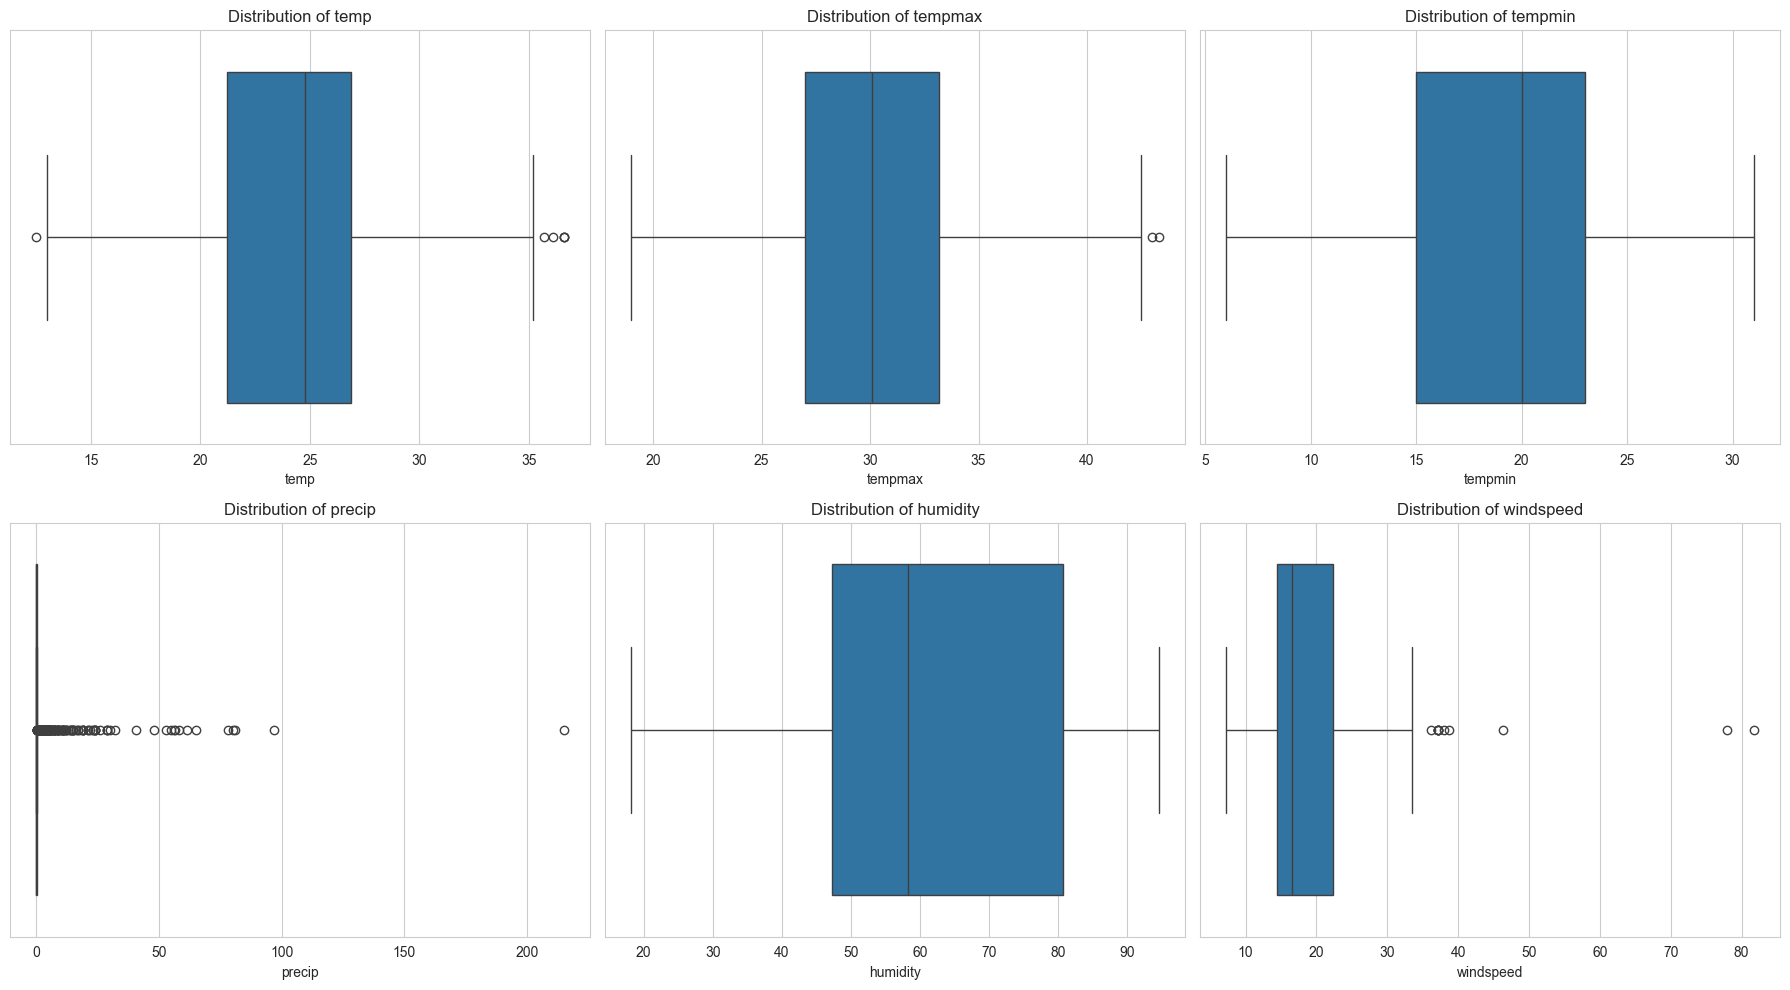

In [16]:
# Let's quickly visualize the distribution of key variables to verify our cleaning
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

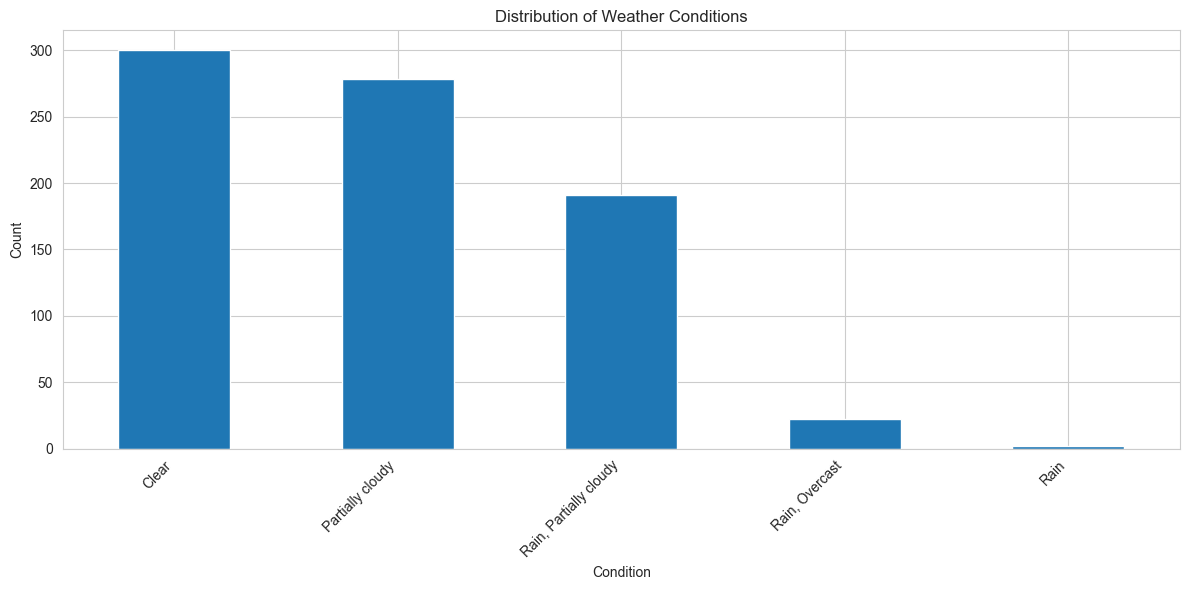

In [17]:
# Check the distribution of weather conditions
plt.figure(figsize=(12, 6))
condition_counts = df['conditions'].value_counts()
condition_counts.plot(kind='bar')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

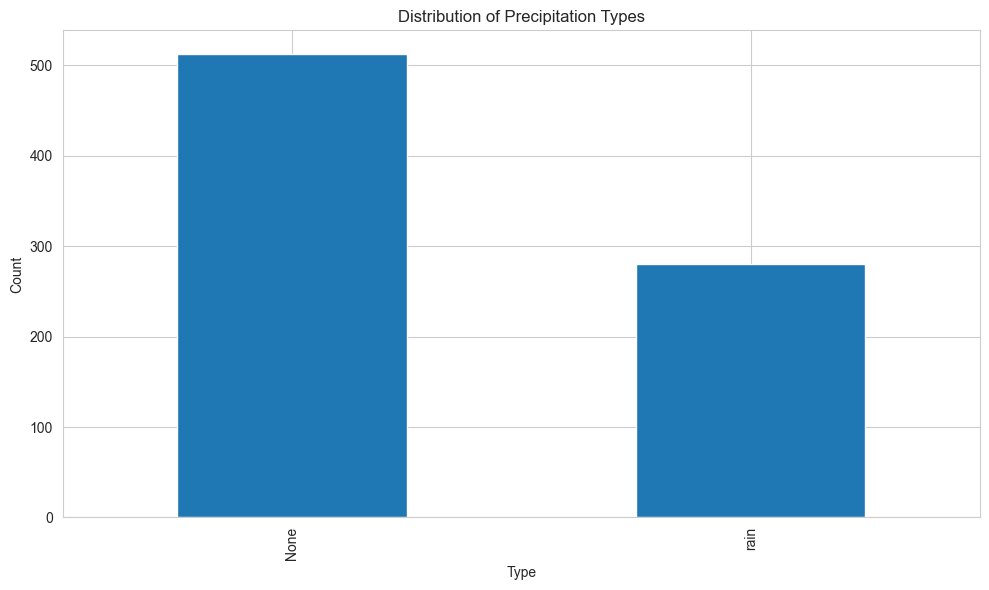

In [18]:
# Check the distribution of precipitation types
plt.figure(figsize=(10, 6))
precip_type_counts = df['preciptype'].value_counts()
precip_type_counts.plot(kind='bar')
plt.title('Distribution of Precipitation Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 8. Final Data Check

In [19]:
# Final check for missing values or inconsistencies
print("Final check for missing values:")
print(df.isnull().sum().sum())

print("\nFinal data shape:")
print(df.shape)

print("\nDate range:")
print(f"Start: {df['datetime'].min()}, End: {df['datetime'].max()}")

Final check for missing values:
0

Final data shape:
(793, 33)

Date range:
Start: 2023-01-01 00:00:00, End: 2025-03-03 00:00:00


## 9. Save Cleaned Data

In [21]:
# Save the cleaned dataset
output_path = "../../data/processed/weather/NewYork_Weather 2023-01-01 to 2025-03-03_Cleaned.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned weather data saved to: {output_path}")

Cleaned weather data saved to: ../../data/processed/weather/NewYork_Weather 2023-01-01 to 2025-03-03_Cleaned.csv


## 10. Summary

In this notebook, we've completed the data cleaning phase of the weather data preprocessing by:

1. Loading and concatenating multiple weather datasets
2. Removing duplicates
3. Converting datetime columns to proper formats
4. Handling missing values, particularly in the preciptype column
5. Detecting and addressing outliers
6. Fixing data inconsistencies
7. Verifying data distributions
8. Saving the final cleaned dataset

This cleaned dataset is now ready for exploratory data analysis and feature engineering.